Algoritmos para modificar la tasa de aprendizaje
===

Preparación
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

Definición del problema
---

En los métodos del gradiente descendente y la regla delta, la magnitud de los cambios en los parámetros dependen de la magnitud del gradiente en cada punto.

* Se desea que la tasa de aprendizaje $\mu$ sea grande para que acelere el avance en regiones lejanas del mínimo.

* Se desea que $\mu$ sea pequeño en la cercania del mínimo para evitar que el algoritmo oscile alrededor del punto de mínima y converja a la solución óptima.

![cambio_gradiente.png](assets/cambio_gradiente.png)

![oscilacion_gradiente.png](assets/oscilacion_gradiente.png)

Esquemas para modificar la tasa de aprendizaje
---

**Tasa de aprendizaje constante**

En esta estrategia, la tasa de aprendizaje ($\mu$) es constante durante todo el proceso. Corresponde al caso anterior.

**Escalado inverso de la tasa de aprendizaje**

La tasa de aprendizaje disminuye a medida que se avanza hacia el mínimo, con el fin de poder entrar en la región de influencia del mínimo de aguja y encontra el punto óptimo.

$$\mu = \frac{\mu_0}{t^n}$$

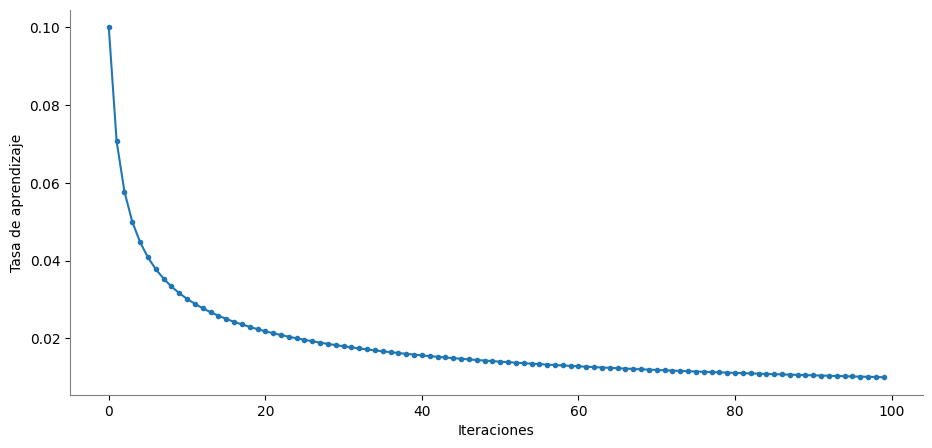

In [2]:
max_iter = 100
mu0 = 0.1
n = 0.5

mu = [mu0 / (t ** n) for t in range(1, max_iter + 1)]

plt.figure(figsize=(11, 5))
plt.plot(mu, ".-", color="tab:blue", label="delta rule")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Iteraciones")
plt.ylabel("Tasa de aprendizaje")
plt.show()

**Estrategia adaptativa**

En esta estrategia la tasa se mantiene constante durante cierto número de iteraciones. Cuando no se puede mejorar el punto actual, la tasa de aprendizaje es dividida por una constante $k$ y se continua con el proceso de optimización.

$$\mu = \frac{\mu}{k}$$

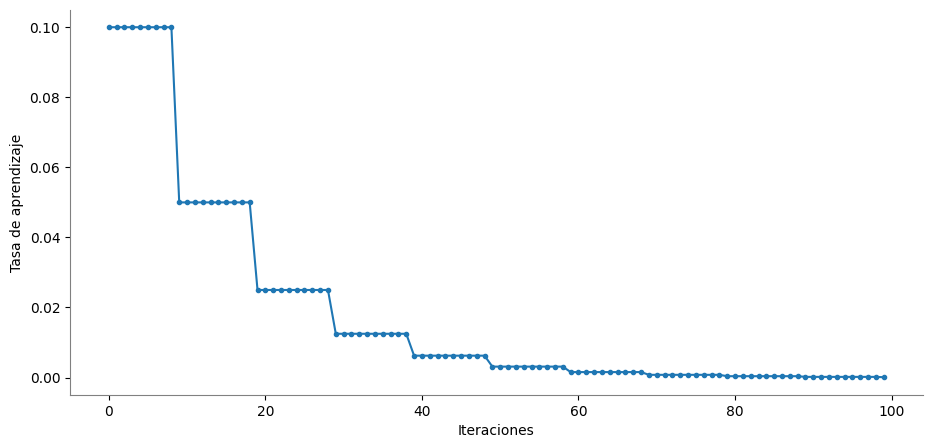

In [3]:
max_iter = 100
mu0 = 0.1
n = 0.5

mu = [mu0 / (2 ** int(t / 10)) for t in range(1, max_iter + 1)]

plt.figure(figsize=(11, 5))
plt.plot(mu, ".-", color="tab:blue", label="delta rule")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Iteraciones")
plt.ylabel("Tasa de aprendizaje")
plt.show()

**Estrategia óptima**

Esta es otra estrategia para disminuir el valor de la tasa de aprendizaje en cada iteración del algoritmo.

$$\mu = \frac{1}{\alpha(t + t_0)}$$

$$t_0 = \frac{1}{\alpha \times \mu_0}$$

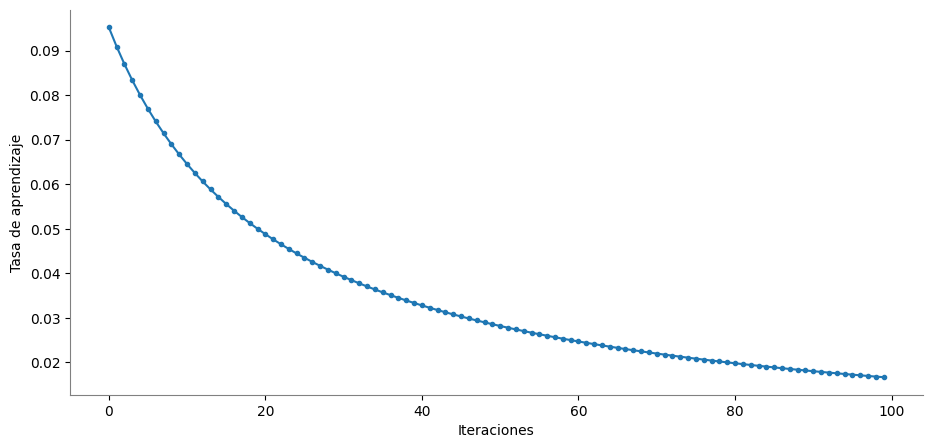

In [4]:
max_iter = 100
mu0 = 0.1
alpha = 0.5

t0 = 1 / (alpha * mu0)

mu = [1 / (alpha * (t + t0)) for t in range(1, max_iter + 1)]

plt.figure(figsize=(11, 5))
plt.plot(mu, ".-", color="tab:blue", label="delta rule")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Iteraciones")
plt.ylabel("Tasa de aprendizaje")
plt.show()

Impacto en la optimización
---

In [5]:
x_sample = np.array(
    [
        0.1087,
        0.2698,
        0.3765,
        0.2146,
        0.9155,
        0.0246,
        0.0221,
        0.8632,
        0.6460,
        0.2092,
        0.8567,
        0.1591,
        0.9647,
        0.6231,
        0.7460,
        0.3654,
        0.3065,
        0.6886,
        0.4966,
        0.2008,
        0.2618,
        0.7607,
        0.1563,
        0.4424,
        0.7731,
    ]
)

y_sample = np.array(
    [
        0.9519,
        1.1237,
        1.2360,
        1.0526,
        2.0743,
        0.7906,
        0.7603,
        2.0533,
        1.6887,
        1.0563,
        2.0991,
        0.8953,
        2.1917,
        1.6266,
        1.8508,
        1.2828,
        1.2283,
        1.8722,
        1.4657,
        1.0418,
        1.1097,
        1.7826,
        0.9711,
        1.4267,
        1.8248,
    ]
)

In [6]:
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

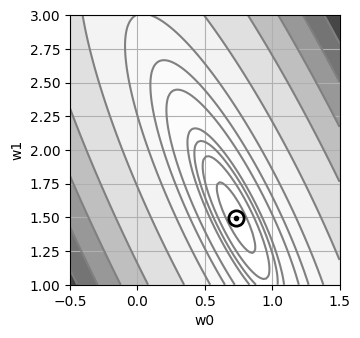

In [7]:
def plot_contour():

    W0 = np.linspace(-0.5, 1.5, 100)
    W1 = np.linspace(1.0, 3.0, 100)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 30, 40, 50, 60]

    _, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)

    plt.plot(
        [0.731],
        [1.498],
        "o",
        color="black",
        fillstyle="none",
        markersize=11,
        markeredgewidth=2,
    )
    plt.plot([0.731], [1.498], ".", color="black")

    ax.set_xlabel("w0")
    ax.set_ylabel("w1")
    ax.grid()


plot_contour()

In [8]:
def gradient(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    gradient_w0 = -2 * sum(errors)
    gradient_w1 = -2 * sum(
        [error * x_value for error, x_value in zip(errors, x_sample)]
    )
    return gradient_w0, gradient_w1

In [9]:
def improve(w0, w1, mu):
    gradient_w0, gradient_w1 = gradient(w0, w1)
    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1
    return w0, w1

Comparación entre las metodologías
---

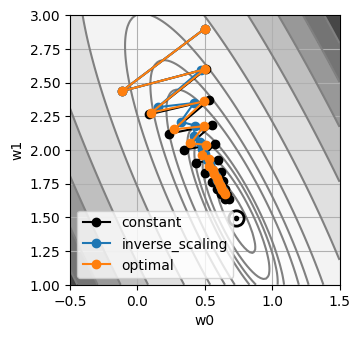

In [10]:
#
# Punto de inicio
#
history = {}

max_iter = 20
mu0 = 0.03
n = 0.1

alpha = 0.5
t0 = 1 / (alpha * mu0)

plot_contour()

strategies = ["constant", "inverse_scaling", "optimal"]
colors = [
    "black",
    "tab:blue",
    "tab:orange",
]

for i_strategy, strategy in enumerate(strategies):

    w0 = 0.5
    w1 = 2.9

    history["w0"] = [w0]
    history["w1"] = [w1]
    history[strategy] = [sse(w0, w1)]

    for epoch in range(max_iter):

        if strategy == "constant":
            mu = mu0

        if strategy == "inverse_scaling":
            mu = mu0 / ((epoch + 1) ** n)

        if strategy == "optimal":
            mu = 1 / (alpha * (epoch + t0))

        w0, w1 = improve(w0, w1, mu)

        history["w0"].append(w0)
        history["w1"].append(w1)
        history[strategy].append(sse(w0, w1))

    plt.plot(
        history["w0"],
        history["w1"],
        marker="o",
        color=colors[i_strategy],
        label=strategy,
    )


plt.legend()
plt.show()

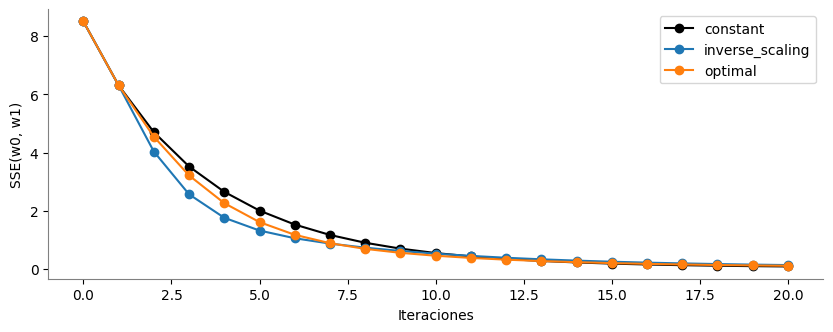

In [11]:
plt.figure(figsize=(10, 3.5))

for i_strategy in range(len(strategies)):
    plt.plot(
        history[strategies[i_strategy]],
        "o-",
        color=colors[i_strategy],
        label=strategies[i_strategy],
    )

plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()